<a href="https://colab.research.google.com/github/Ghjkltyui/bus-reservation/blob/main/cat_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 312MB/s]
100% 1.06G/1.06G [00:04<00:00, 273MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels ='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels ='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Normalize
def process(image,label):
  image =tf.cast(image/255.  ,tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
#create CNN model

model =Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history= model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 107ms/step - loss: 1.3959 - accuracy: 0.5913 - val_loss: 0.6258 - val_accuracy: 0.6352
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5837 - accuracy: 0.7030 - val_loss: 0.5372 - val_accuracy: 0.7282
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5165 - accuracy: 0.7504 - val_loss: 0.5533 - val_accuracy: 0.7190
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4664 - accuracy: 0.7814 - val_loss: 0.4396 - val_accuracy: 0.7970
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3943 - accuracy: 0.8277 - val_loss: 0.4627 - val_accuracy: 0.7804
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3471 - accuracy: 0.8516 - val_loss: 0.4513 - val_accuracy: 0.7888
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2568 - accuracy: 0.8906 - val_loss: 0.7123 - val_ac

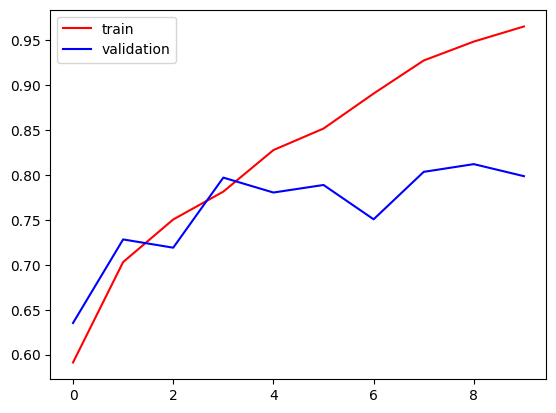

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label ='train')
plt.plot(history.history['val_accuracy'],color='blue',label ='validation')
plt.legend()
plt.show()


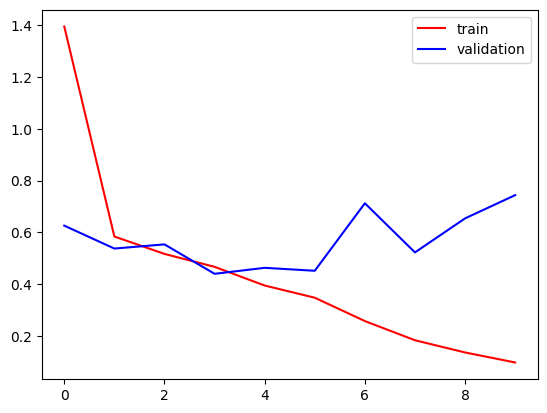

In [23]:
plt.plot(history.history['loss'],color='red',label ='train')
plt.plot(history.history['val_loss'],color='blue',label ='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

#add more data
#data augmentation
#l1/l2 regularizer
#dropout
#batch norm
#reduce complexity




In [24]:
import cv2

In [32]:
test_img  = cv2.imread('/content/cat.jpeg')

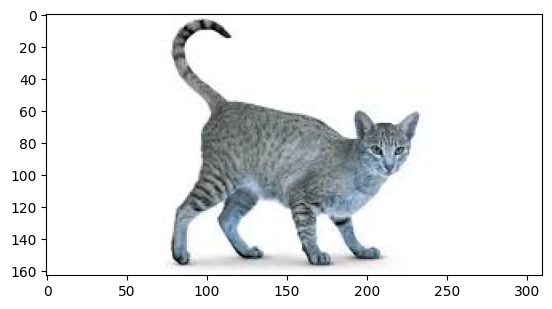

In [33]:
plt.imshow(test_img)

In [34]:
test_img.shape

(163, 310, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)